# City-Managed Trees in Pittsburgh

By Q

Trees are an important indicator of environmental quality and livability in urban neighborhoods. The City of Pittsburgh Department of Public Works Forestry Division manages and maintains thousands of trees throughout the city. This dataset tracks every tree under city management, including information about tree species, location, and health. More trees in a neighborhood generally means better air quality, reduced urban heat, and improved quality of life for residents.

https://data.wprdc.org/dataset/city-trees

For my sub-metric, I focused on the total number of city-managed trees in each Pittsburgh neighborhood. I chose this measure because it provides insight into the environmental health and quality of life in each neighborhood. Neighborhoods with more trees benefit from cleaner air, reduced stormwater runoff, lower temperatures in summer, and more pleasant streetscapes.

My initial idea was to measure park acreage, but I decided that tree count offers a more direct and measurable indicator of green infrastructure that residents interact with daily. Trees line streets, provide shade, and contribute to the character of a neighborhood in ways that are immediately visible and beneficial.

By analyzing this dataset, I aimed to understand which neighborhoods have the highest number of city-maintained trees — under the assumption that more trees correlates with better environmental quality and neighborhood livability.

The above dataset contains information about every tree managed by the City of Pittsburgh's Forestry Division. It includes the neighborhood location, tree species, diameter, and health condition of each tree.

To create my metric, I counted the total number of trees in each neighborhood:

**Tree Count = Total number of trees per neighborhood**

Then, to make the metric comparable with others in our group, I normalized it to a 0–1 "score", where a higher score means a "better" neighborhood (more trees).

**Normalized Value = (x - xmin)/(xmax-xmin)**

# So What's the Best Neighborhood?

After counting the total number of city-managed trees in each neighborhood, I ranked them from highest to lowest. Neighborhoods with the highest tree counts are considered the "best" under this sub-metric because they have more green infrastructure providing environmental benefits.

When visualized in a chart, certain patterns emerge. Larger neighborhoods or those with more street tree programs tend to have higher counts. The neighborhood with the most trees benefits from extensive tree canopy coverage, which helps with air quality, temperature regulation, and aesthetic appeal.

The visualization below ranks all neighborhoods by their total number of city-managed trees.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# "trees_url" stores web address
# read the cvs file, but carefully to avoid warnings
# all tree data stored in "trees"
trees_url = "https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da"
trees = pd.read_csv(trees_url, low_memory=False)

print("Preview of tree data:")
# show first 5 rows
# show how many total rows are there
print(trees.head())
print(f"\nTotal trees in dataset: {len(trees)}")

Preview of tree data:
   _id          id address_number         street         common_name  \
0    1   754166088           7428  MONTICELLO ST               Stump   
1    2  1946899269            220     BALVER AVE  Linden: Littleleaf   
2    3  1431517397           2822      SIDNEY ST          Maple: Red   
3    4   994063598            608     SUISMON ST      Maple: Freeman   
4    5  1591838573           1135   N NEGLEY AVE       Maple: Norway   

    scientific_name  height  width  growth_space_length  growth_space_width  \
0             Stump     0.0    0.0                 10.0                 2.0   
1     Tilia cordata     0.0    0.0                 99.0                99.0   
2       Acer rubrum    22.0    6.0                  6.0                 3.0   
3  Acer x freemanii    25.0   10.0                  3.0                 3.0   
4  Acer platanoides    52.0   13.0                 99.0                99.0   

   ...      neighborhood  council_district  ward         tract  \
0  .

In [5]:
# take all trees and group them
# count how many trees are in each group
# turn them into columns
trees_by_hood = trees.groupby('neighborhood').size().reset_index(name='tree_count')

# remove trees that are not in specific neighborhoods
trees_by_hood = trees_by_hood.dropna(subset=['neighborhood'])

# add up all trees in every neighborhood
# calculate the % by trees in each neighborhood 
total_trees = trees_by_hood['tree_count'].sum()
trees_by_hood['pct_of_total'] = (trees_by_hood['tree_count'] / total_trees) * 100

# take values of neighborhoods with the smallest tree count
# take values of neighborhoods with the largest tree count
# use formula to convert into 0 and 1 scale
# least trees=0, most trees=1 and evrything else false in between
vals = trees_by_hood['tree_count']
trees_by_hood['tree_score'] = (vals - vals.min()) / (vals.max() - vals.min())

# arrange data in order, use the "tree_count" column
# biggest to smallest - descending 
ranked = trees_by_hood.sort_values('tree_count', ascending=False)

print("Top 10 neighborhoods by tree count:")
print(ranked[['neighborhood', 'tree_count', 'pct_of_total', 'tree_score']].head(10))

Top 10 neighborhoods by tree count:
                 neighborhood  tree_count  pct_of_total  tree_score
76        Squirrel Hill South        5073     11.161716    1.000000
39              Highland Park        2941      6.470847    0.579653
75        Squirrel Hill North        2083      4.583058    0.410489
71           South Side Flats        1693      3.724972    0.333596
67                  Shadyside        1558      3.427943    0.306979
9                  Bloomfield        1436      3.159516    0.282926
28               East Liberty        1366      3.005501    0.269125
62               Point Breeze        1316      2.895490    0.259267
60                Perry North        1007      2.215622    0.198344
16  Central Business District        1002      2.204620    0.197358


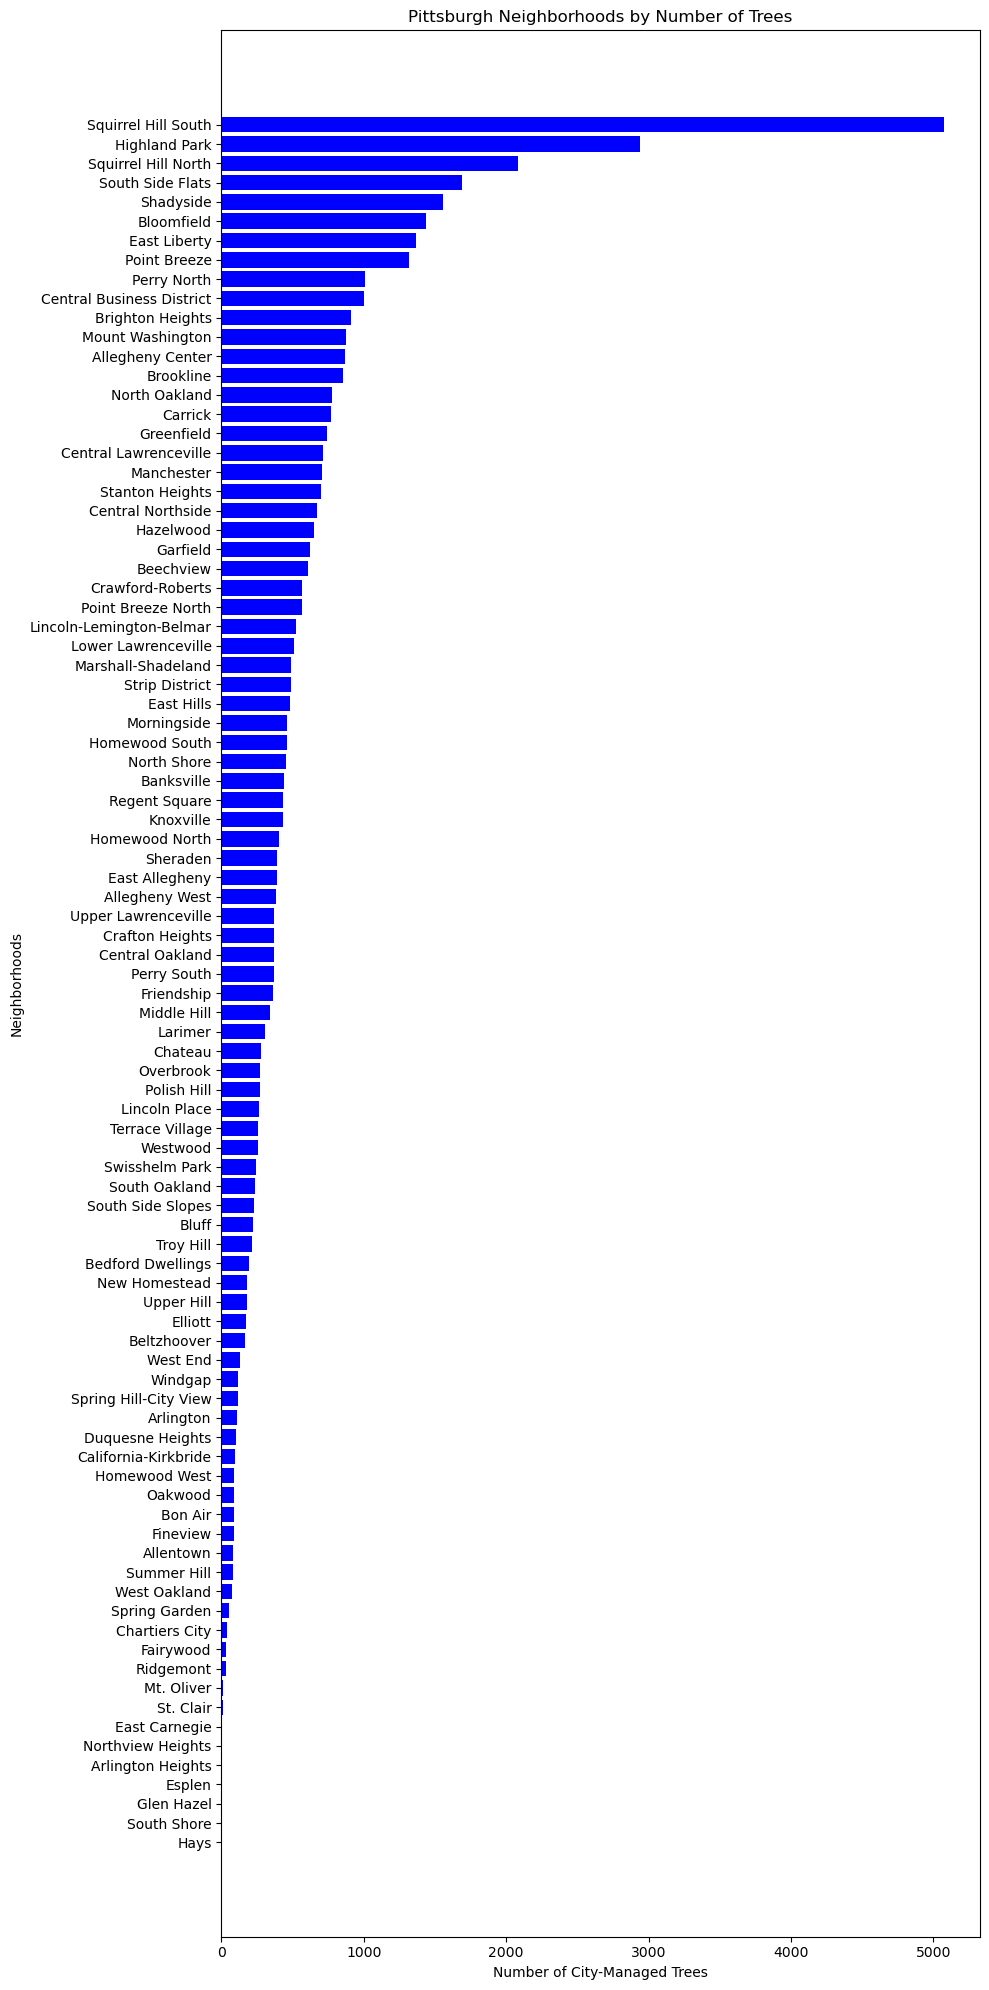

Best Neighborhood (Tree Count metric): Squirrel Hill South
- 5073 city-managed trees
- 11% of all Pittsburgh city trees


In [15]:
# makes a blank canvas
plt.figure(figsize=(10, 20))

# create horizontal bar chart with neighborhood names
plt.barh(ranked['neighborhood'], ranked['tree_count'], color='blue')

# flip the chart upside down
plt.gca().invert_yaxis()

# add labels to the chart
plt.xlabel("Number of City-Managed Trees")
plt.ylabel("Neighborhoods")
plt.title("Pittsburgh Neighborhoods by Number of Trees")

# beautifier:)
plt.tight_layout()

# actually display the chart
plt.show()

# print the best neighborhood
# get the first row
best = ranked.iloc[0]
print(f"Best Neighborhood (Tree Count metric): {best['neighborhood']}")
print(f"- {best['tree_count']:.0f} city-managed trees")
print(f"- {best['pct_of_total']:.0f}% of all Pittsburgh city trees")

# Conclusion

While the metric identifies Squirrel hill South as the "best" in terms of city-managed tree count, my personal favorite neighborhood is North Shore. The data-driven approach shows which neighborhoods have the most green infrastructure, but it doesn't capture everything that makes a neighborhood great. My metric measures environmental quality through tree coverage, but it doesn't account for factors like accessibility, cultural diversity, or community spaces. In other words, data provides one valuable perspective, but "best" is subjective and depends on individual priorities and what people value in where they live.